In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/final_year_project/final_dataset (1).csv")

In [4]:
data_e=pd.read_csv("/content/drive/MyDrive/final_year_project/Equity (1).csv")

In [5]:
data.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Co Name'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682933 entries, 0 to 682932
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       682933 non-null  object 
 1   Open Price                 682933 non-null  float64
 2   High Price                 682933 non-null  float64
 3   Low Price                  682933 non-null  float64
 4   Close Price                682933 non-null  float64
 5   WAP                        682933 non-null  float64
 6   No.of Shares               682933 non-null  int64  
 7   No. of Trades              682933 non-null  int64  
 8   Total Turnover (Rs.)       682933 non-null  float64
 9   Deliverable Quantity       680396 non-null  float64
 10  % Deli. Qty to Traded Qty  680396 non-null  float64
 11  Spread High-Low            682933 non-null  float64
 12  Spread Close-Open          682933 non-null  float64
 13  Co Name                    68

In [7]:
data=data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680396 entries, 0 to 682932
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       680396 non-null  object 
 1   Open Price                 680396 non-null  float64
 2   High Price                 680396 non-null  float64
 3   Low Price                  680396 non-null  float64
 4   Close Price                680396 non-null  float64
 5   WAP                        680396 non-null  float64
 6   No.of Shares               680396 non-null  int64  
 7   No. of Trades              680396 non-null  int64  
 8   Total Turnover (Rs.)       680396 non-null  float64
 9   Deliverable Quantity       680396 non-null  float64
 10  % Deli. Qty to Traded Qty  680396 non-null  float64
 11  Spread High-Low            680396 non-null  float64
 12  Spread Close-Open          680396 non-null  float64
 13  Co Name                    68

In [9]:
data_e.columns

Index(['Security Code', 'Issuer Name', 'Security Id', 'Security Name',
       'Status', 'Group', 'Face Value', 'ISIN No', 'Industry', 'Instrument',
       'Sector Name', 'Industry New Name', 'Igroup Name', 'ISubgroup Name'],
      dtype='object')

In [10]:
data_e=data_e.dropna()

In [11]:
data_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Security Code      4231 non-null   int64  
 1   Issuer Name        4231 non-null   object 
 2   Security Id        4231 non-null   object 
 3   Security Name      4231 non-null   object 
 4   Status             4231 non-null   object 
 5   Group              4231 non-null   object 
 6   Face Value         4231 non-null   float64
 7   ISIN No            4231 non-null   object 
 8   Industry           4231 non-null   object 
 9   Instrument         4231 non-null   object 
 10  Sector Name        4231 non-null   object 
 11  Industry New Name  4231 non-null   object 
 12  Igroup Name        4231 non-null   object 
 13  ISubgroup Name     4231 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 462.9+ KB


In [12]:
merged_df = pd.merge(data, data_e, left_on='Co Name', right_on='Security Code', how='left')
# Add a new column 'Issuer Name' to df1 with values from df2
data['Issuer Name'] = merged_df['Issuer Name']
data['Sector']=merged_df['Industry']

In [13]:
print(data.columns)

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Co Name', 'Issuer Name', 'Sector'],
      dtype='object')


In [ ]:
from itertools import combinations
from tqdm import tqdm
unique_companies = data["Co Name"].unique()
correlation_dict = {}

# Iterate through pairs of unique companies and compute the cross-correlation
with tqdm(total=len(list(combinations(unique_companies, 2))) // 2) as pbar:
    for company1, company2 in combinations(unique_companies, 2):
        if (company1, company2) not in correlation_dict:
            condition1 = (data['Co Name'] == company1)
            condition2 = (data['Co Name'] == company2)

            prices_close = data.loc[condition1, 'Close Price'].tolist()
            prices_wap = data.loc[condition1, 'WAP'].tolist()
            prices2_close = data.loc[condition2, 'Close Price'].tolist()
            prices2_wap = data.loc[condition2, 'WAP'].tolist()

            # Calculate cross-correlation with a lag of 1 week (7 days)
            cross_correlation_close = np.correlate(prices_close, prices2_close, mode='full')
            cross_correlation_wap = np.correlate(prices_wap, prices2_wap, mode='full')

            # Normalize the cross-correlation values
            max_correlation_close = cross_correlation_close.max()
            max_correlation_wap = cross_correlation_wap.max()

            # Average of Close Price and WAP correlations
            avg_correlation = (max_correlation_close + max_correlation_wap) / 2

            correlation_dict[(company1, company2)] = avg_correlation
            pbar.update(1)

# Create the correlation matrix
correlation_matrix2 = np.zeros((len(unique_companies), len(unique_companies)))

for i, company1 in enumerate(unique_companies):
    for j, company2 in enumerate(unique_companies):
        if i < j:
            correlation_matrix2[i, j] = correlation_dict[(company1, company2)]
        elif i > j:
            correlation_matrix2[i, j] = correlation_dict[(company2, company1)]

# Fill the diagonal elements with 1 since the cross-correlation with itself is 1
np.fill_diagonal(correlation_matrix2, 1)

# Print the final correlation matrix
print("Average Cross-Correlation Matrix:")
print(pd.DataFrame(correlation_matrix2, columns=unique_companies, index=unique_companies))

  4%|▍         | 4723/105787 [00:17<06:21, 264.65it/s]


KeyboardInterrupt: ignored

In [14]:
correlation_tables = []
pivot_table = data.pivot_table(index='Date', columns='Issuer Name', values='Close Price')
correlation_tables.append(pivot_table)
correlation_matrix = pivot_table.corr()
print(correlation_matrix)

Issuer Name                         ABB India Limited   ACC Ltd  \
Issuer Name                                                       
ABB India Limited                            1.000000  0.821580   
ACC Ltd                                      0.821580  1.000000   
AGI GREENPAC LIMITED                         0.074787  0.138924   
ALGOQUANT FINTECH LIMITED                    0.892126  0.968439   
AMJ LAND HOLDINGS LIMITED                    0.415844  0.605284   
...                                               ...       ...   
Wipro  Ltd.,                                -0.447480 -0.012388   
Wires & Fabriks (SA) Ltd.,                  -0.033050  0.377541   
Zee Entertainment Enterprises Ltd.          -0.258972 -0.147147   
Zensar Technologies Ltd.                     0.446244  0.496793   
Zuari Industries Limited                    -0.651908 -0.788158   

Issuer Name                         AGI GREENPAC LIMITED  \
Issuer Name                                                
ABB Indi

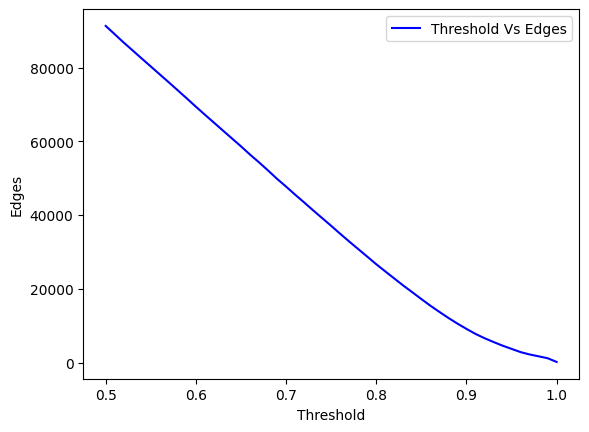

In [15]:
start = 0.5
end = 1.0
step = 0.01

threshold = []
degree = []

for t in np.arange(start, end + step, step):
    threshold.append(t)

    # Create an empty list to store the edges
    edges = []

    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            weight = correlation_matrix.iloc[i, j]  # Access the correlation using .iloc
            if abs(weight) >= t:
                edges.append([i, j, weight])

    x = len(edges)
    degree.append(x)

# Plot the data
plt.plot(threshold, degree, label='Threshold Vs Edges', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Edges')

# Add a legend
plt.legend()
plt.show()

In [16]:
# Set the threshold value
threshold = 0.9

  # Get the company names from the column names of the correlation matrix
company_names = correlation_matrix.columns.tolist()

  # Create an empty list to store the edges
edges = []

  # Iterate over the correlation matrix and extract the edges based on the threshold
for i in range(len(company_names)):
  for j in range(i + 1, len(company_names)):
    from_edge = company_names[i]
    to_edge = company_names[j]
    weight = correlation_matrix.iloc[i, j]
    if abs(weight) >= threshold:
      edges.append([from_edge, to_edge, weight])
# Create a DataFrame from the edges list
edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Export the edge list as a CSV file
edge_list.to_csv('bseedge_list500.csv', index=False)

In [17]:
print(edge_list)

                             Source                               Target  \
0                 ABB India Limited         ANTARIKSH INDUSTRIES LIMITED   
1                 ABB India Limited                      Arshiya Limited   
2                 ABB India Limited           Bannari Amman Sugars Ltd.,   
3                 ABB India Limited  Brady & Morris Engineering Co. Ltd.   
4                 ABB India Limited         C.J. Gelatine Products Ltd.,   
...                             ...                                  ...   
9133  W.S. Industries (India) Ltd.,  WELSPUN SPECIALTY SOLUTIONS LIMITED   
9134  W.S. Industries (India) Ltd.,                 Welcast Steels Ltd.,   
9135                       WPIL Ltd                      Warren Tea Ltd.   
9136                       WPIL Ltd       West Coast Paper Mills Limited   
9137           Welcast Steels Ltd.,       West Coast Paper Mills Limited   

        Weight  
0     0.963713  
1     0.904904  
2     0.912159  
3     0.927930  
4 

0.4234668175958285


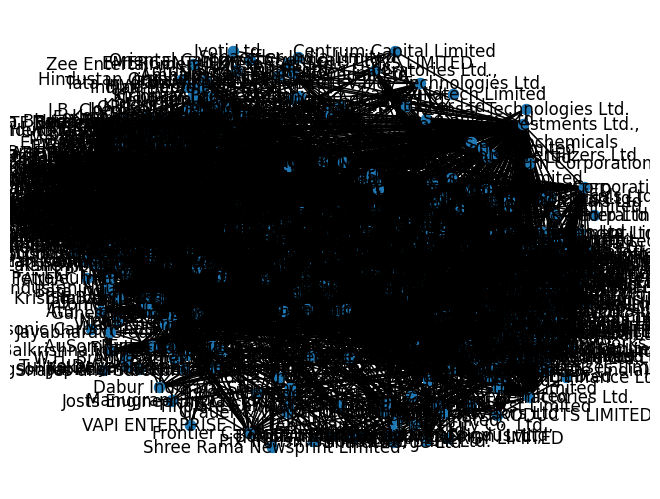

In [18]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Iterate over the edge list and add nodes and weighted edges to the graph
for row in edge_list.itertuples():
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight)

# Modularity
communities = list(nx.community.greedy_modularity_communities(G))
modularity = nx.community.modularity(G, communities)
print(modularity)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.write_graphml(G, "graph.gephi.graphml")
plt.show()


In [19]:
# Calculate network science parameters
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)
print("Company with Maximum Degree Centrality:")
print("Company Name:", max_degree_node)
print("Degree Centrality:", degree_centrality[max_degree_node])
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
print("Company with Maximum Betweenness Centrality:")
print("Company Name:", max_betweenness_node)
print("Betweenness Centrality:", betweenness_centrality[max_betweenness_node])

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
print("Company with Maximum Closeness Centrality:")
print("Company Name:", max_closeness_node)
print("Closeness Centrality:", closeness_centrality[max_closeness_node])

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Company with Maximum Eigenvector Centrality:")
print("Company Name:", max_eigenvector_node)
print("Eigenvector Centrality:", eigenvector_centrality[max_eigenvector_node])

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
max_clustering_node = max(clustering_coefficient, key=clustering_coefficient.get)
print("Company with Maximum Clustering Coefficient:")
print("Company Name:", max_clustering_node)
print("Clustering Coefficient:", clustering_coefficient[max_clustering_node])


Company with Maximum Degree Centrality:
Company Name: Swastik Safe Deposit & Invest. Ltd.
Degree Centrality: 0.784375
Company with Maximum Betweenness Centrality:
Company Name: Swastik Safe Deposit & Invest. Ltd.
Betweenness Centrality: 0.3527010448374878
Company with Maximum Closeness Centrality:
Company Name: Swastik Safe Deposit & Invest. Ltd.
Closeness Centrality: 0.7990012484394506
Company with Maximum Eigenvector Centrality:
Company Name: Kemp & Company Limited
Eigenvector Centrality: 0.1770239715121136
Company with Maximum Clustering Coefficient:
Company Name: Jaysynth Dyestuff (India) Ltd.,
Clustering Coefficient: 1.0


<ipython-input-20-7e59a9e60fca>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=cmap(i), label=label)


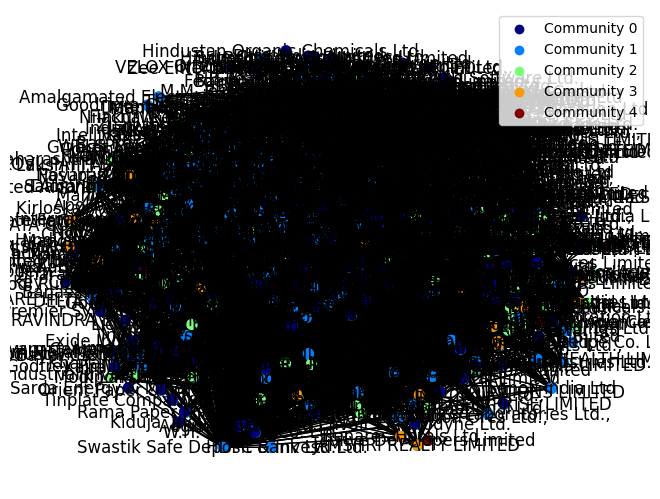

Modularity: 0.4234668175958285
Number of Communities: 5


In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create or load your graph (G) using NetworkX
# ...

# Perform community detection using the Louvain method
communities = list(nx.community.greedy_modularity_communities(G))
modularity = nx.community.modularity(G, communities)

# Create a mapping of nodes to communities
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

# Extract positions of nodes in the graph
pos = nx.spring_layout(G)

# Create a custom color map for communities
num_communities = len(communities)
cmap = plt.get_cmap('jet', num_communities)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw nodes with colors based on communities using the custom color map
node_colors = [community_mapping[node] for node in G.nodes()]
node_color_values = [cmap(i) for i in node_colors]
nx.draw_networkx_nodes(G, pos, node_color=node_color_values, node_size=50)

# Add a legend
legend_labels = {community_id: f"Community {community_id}" for community_id in set(community_mapping.values())}
for i, label in legend_labels.items():
    plt.scatter([], [], c=cmap(i), label=label)
plt.legend()

# Show the plot
plt.show()

# Print the modularity and the number of communities
print("Modularity:", modularity)
print("Number of Communities:", num_communities)
nx.write_graphml(G, "graph.gephi.graphml")

In [21]:
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {list(community)}")

Community 1: ['Alembic  Ltd', 'TANFAC Industries Ltd.,', 'Softbpo Global Services Ltd.', 'Dalmia Bharat Sugar and Industries Ltd', 'Indo Rama Synthetics (India) Ltd.,', 'Premier Synthetics Ltd.,', 'Styrenix Performance Materials Limited', 'KPT INDUSTRIES LIMITED', 'Century Enka Ltd.,', 'Oriental Carbon & Chemicals Ltd.,', 'Whirlpool of India Ltd', 'Hindustan Composites Ltd', 'M.P. Agro Industries Ltd.,', 'JAINEX AAMCOL LTD.', 'Forbes & Company Ltd', 'Godrej Industries Ltd.', 'Schaeffler India Limited', 'Nelco Ltd', 'JSW Steel Limited', 'Ruby Mills Ltd.,', 'Jindal Hotels Ltd.,', 'Manugraph India Ltd', 'PTL Enterprises Ltd', 'Swan Energy Ltd.', 'Uflex Limited', 'GARWARE TECHNICAL FIBRES LIMITED', 'HeidelbergCement  India Limited', 'TTK Healthcare Ltd.,', 'Rubfila International Ltd.', 'Sarda Energy & Minerals Ltd', 'Peoples Investments Ltd.,', 'Bayer CropScience Limited.', 'ORIENTAL AROMATICS LIMITED', 'Indokem Ltd', 'SMIFS Capital Markets Ltd.,', 'Polychem Ltd', 'Timex Group India Ltd', 

In [22]:
# Assuming you already have communities obtained using greedy_modularity_communities
communities = list(nx.community.greedy_modularity_communities(G))

# Function to find sub-communities within a given community
def find_sub_communities(community, G):
    subgraph = G.subgraph(community)
    sub_communities = list(nx.community.greedy_modularity_communities(subgraph))
    return sub_communities

# Find sub-communities for each community
all_sub_communities = []
for i, community in enumerate(communities):
    sub_communities = find_sub_communities(community, G)
    all_sub_communities.append(sub_communities)

    print(f"Sub-Communities for Community {i + 1} (Total {len(community)} nodes):")
    for j, sub_community in enumerate(sub_communities):
        print(f"Sub-Community {j + 1} ({len(sub_community)} nodes): {list(sub_community)}")

Sub-Communities for Community 1 (Total 248 nodes):
Sub-Community 1 (36 nodes): ['Indo Rama Synthetics (India) Ltd.,', 'Raymond Limited', 'Ester Industries Ltd.,', 'Sinnar Bidi Udyog Ltd.,', 'Centrum Capital Limited', 'Triveni Glass Ltd.,', 'Prime Securities Ltd.', 'Deepak Fertilizers &Petrochemicals', 'Hindustan Organic Chemicals Ltd.,', 'W.H. Brady & Co. Ltd.,', 'EMERGENT INDUSTRIAL SOLUTIONS LIMITED', 'Mipco Seamless Rings (Gujarat) Ltd.', 'TTK Healthcare Ltd.,', 'NATH INDUSTRIES LIMITED', 'India Glycols Ltd', 'Apis India Ltd', 'Seshasayee Paper & Boards Ltd.,', 'GRP Limited', 'Tata Motors Ltd.', 'Kothari Fermanatation & Biochem Ltd', 'SNL Bearings Ltd.', 'Bhagwati Oxygen Ltd.,', 'Shricon Industries Ltd.,', 'Walchand Peoplefirst Limited', 'Cochin Malabar Estates & Indus. Ltd', 'Genesys International Corporation Ltd.', 'Sanathnagar Enterprises Limited', 'Gujarat Narmada Valley Fert.Co.Ltd', 'Jagsonpal Pharmaceuticals Limited,', 'PRISM JOHNSON LIMITED.', 'Shree Rama Newsprint Limited',

In [44]:
salary_conditional = data.loc[data['Issuer Name'] == 'ABB India Limited', 'Sector'].values
print(salary_conditional)

['Heavy Electrical Equipment' 'Heavy Electrical Equipment'
 'Heavy Electrical Equipment' ... 'Heavy Electrical Equipment'
 'Heavy Electrical Equipment' 'Heavy Electrical Equipment']


In [ ]:
print(data.columns)

In [ ]:
data['Issuer Name']

In [61]:
# Function to find sub-communities within a given community
def find_sub_communities(community, G):
    subgraph = G.subgraph(community)
    sub_communities = list(nx.community.greedy_modularity_communities(subgraph))
    return sub_communities

# Find sub-communities for each community
all_sub_communities = []
for i, community in enumerate(communities):
    sub_communities = find_sub_communities(community, G)
    all_sub_communities.append(sub_communities)

    print(f"Sub-Communities for Community {i + 1} (Total {len(community)} nodes):")
    for j, sub_community in enumerate(sub_communities):
        unique_sectors = set()
        print(f"Sub-Community {j + 1} ({len(sub_community)} nodes): {list(sub_community)}")
        for comm in list(sub_community):
            sectors = data.loc[data['Issuer Name'] == comm, 'Sector'].values
            unique_sectors.update(sectors)
        print(f"Unique Sectors: {unique_sectors}")
        for sector in unique_sectors:
            count = sum(data.loc[data['Sector'] == sector, 'Issuer Name'].isin(sub_community))
            print(f"Sector: {sector}, Count: {count}")

Sub-Communities for Community 1 (Total 248 nodes):
Sub-Community 1 (36 nodes): ['Indo Rama Synthetics (India) Ltd.,', 'Raymond Limited', 'Ester Industries Ltd.,', 'Sinnar Bidi Udyog Ltd.,', 'Centrum Capital Limited', 'Triveni Glass Ltd.,', 'Prime Securities Ltd.', 'Deepak Fertilizers &Petrochemicals', 'Hindustan Organic Chemicals Ltd.,', 'W.H. Brady & Co. Ltd.,', 'EMERGENT INDUSTRIAL SOLUTIONS LIMITED', 'Mipco Seamless Rings (Gujarat) Ltd.', 'TTK Healthcare Ltd.,', 'NATH INDUSTRIES LIMITED', 'India Glycols Ltd', 'Apis India Ltd', 'Seshasayee Paper & Boards Ltd.,', 'GRP Limited', 'Tata Motors Ltd.', 'Kothari Fermanatation & Biochem Ltd', 'SNL Bearings Ltd.', 'Bhagwati Oxygen Ltd.,', 'Shricon Industries Ltd.,', 'Walchand Peoplefirst Limited', 'Cochin Malabar Estates & Indus. Ltd', 'Genesys International Corporation Ltd.', 'Sanathnagar Enterprises Limited', 'Gujarat Narmada Valley Fert.Co.Ltd', 'Jagsonpal Pharmaceuticals Limited,', 'PRISM JOHNSON LIMITED.', 'Shree Rama Newsprint Limited',

Sub-Communities for Community 1 (Total 248 nodes):
Sub-Community 1 (36 nodes): ['Indo Rama Synthetics (India) Ltd.,', 'Raymond Limited', 'Ester Industries Ltd.,', 'Sinnar Bidi Udyog Ltd.,', 'Centrum Capital Limited', 'Triveni Glass Ltd.,', 'Prime Securities Ltd.', 'Deepak Fertilizers &Petrochemicals', 'Hindustan Organic Chemicals Ltd.,', 'W.H. Brady & Co. Ltd.,', 'EMERGENT INDUSTRIAL SOLUTIONS LIMITED', 'Mipco Seamless Rings (Gujarat) Ltd.', 'TTK Healthcare Ltd.,', 'NATH INDUSTRIES LIMITED', 'India Glycols Ltd', 'Apis India Ltd', 'Seshasayee Paper & Boards Ltd.,', 'GRP Limited', 'Tata Motors Ltd.', 'Kothari Fermanatation & Biochem Ltd', 'SNL Bearings Ltd.', 'Bhagwati Oxygen Ltd.,', 'Shricon Industries Ltd.,', 'Walchand Peoplefirst Limited', 'Cochin Malabar Estates & Indus. Ltd', 'Genesys International Corporation Ltd.', 'Sanathnagar Enterprises Limited', 'Gujarat Narmada Valley Fert.Co.Ltd', 'Jagsonpal Pharmaceuticals Limited,', 'PRISM JOHNSON LIMITED.', 'Shree Rama Newsprint Limited',

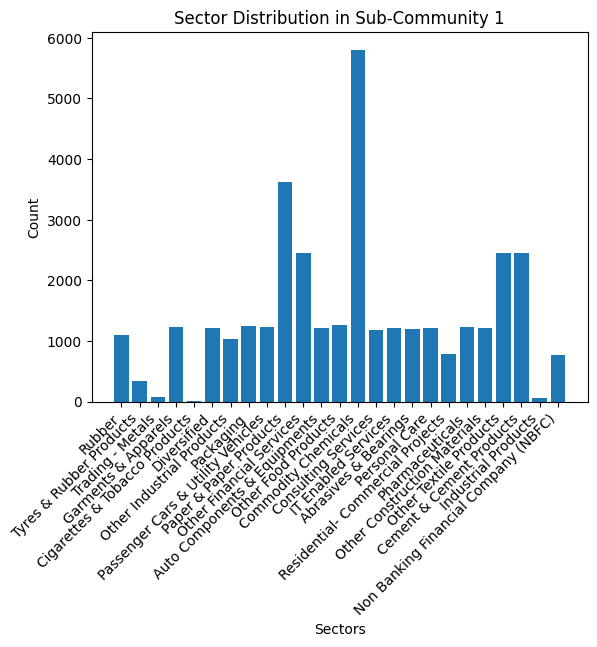

Sub-Community 2 (34 nodes): ['Softbpo Global Services Ltd.', 'Gujchem Distillers India Ltd.,', 'Neelamalai Agro Industries Ltd.,', 'Lyka Labs Ltd.,', 'Styrenix Performance Materials Limited', 'Banco Products (India) Ltd.,', 'M.P. Agro Industries Ltd.,', 'Umang Dairies Limited', 'Muller & Phipps (India) Ltd.,', 'FIBERWEB (INDIA) LTD.', 'Kesar Enterprises Ltd.,', 'Baroda Rayon Corpn. Ltd.,', 'JSW Steel Limited', 'IST Limited', 'Heubach Colorants India Limited', 'HIM TEKNOFORGE LIMITED', 'SpiceJet Limited', 'ORIENTAL AROMATICS LIMITED', 'SMIFS Capital Markets Ltd.,', 'Bhansali Engineering Polymers Ltd.,', 'Ashnoor Textiles Mills Ltd.', 'HLV LIMITED', 'Indian Card Clothing Ltd', 'Kirloskar Industries Ltd', 'Hardcastle & Waud Mfg. Co. Ltd.,', 'ANTARIKSH INDUSTRIES LIMITED', 'Manipal Finance Corporation Ltd.,', 'BOMBAY OXYGEN INVESTMENTS LIMITED', 'DOLAT ALGOTECH LIMITED', 'Bombay Burmah Trading Corpn. Ltd.,', 'UCAL LIMITED', 'G.G. Dandekar Machine Works Ltd.,', 'Ion Exchange (India) Ltd', '

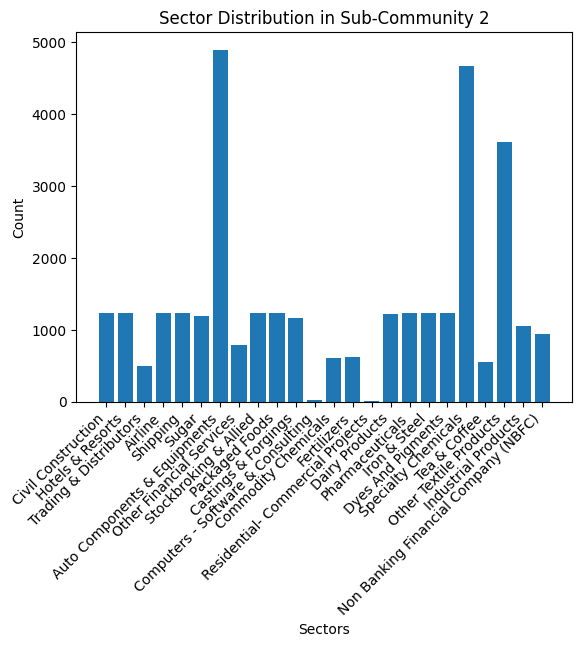

Sub-Community 3 (33 nodes): ['Bharat Forge Ltd', 'Citadel Realty And Developers Limited', 'Singer India Limited', 'Frontier Capital Limited', 'GTL Ltd', 'Southern Gas Ltd.,', 'MSR India Limited', 'Jupiter Industries & Leasing Ltd.,', 'Som Distilleries & Breweries Ltd.', 'RAVINDRA ENERGY LIMITED', 'Jindal Hotels Ltd.,', 'Thomas Cook (India) Ltd.,', 'Bajaj Steel Industries Ltd.,', 'GARWARE TECHNICAL FIBRES LIMITED', 'HEG Ltd.', 'WESTLIFE FOODWORLD LIMITED', 'Kinetic Engineering Ltd.,', 'Piccadily Sugar  & Allied Ltd.', 'Timex Group India Ltd', 'Hindalco Industries Ltd.', 'Kirloskar Pneumatic Co.Ltd.', 'Aegis Logistics Ltd.', 'Indian Infotech And Software Ltd.,', 'Nyssa Corporation Limited', 'Zee Entertainment Enterprises Ltd.', 'Indag Rubber Ltd.,', 'Shaily Engineering Plastics Ltd.', 'Photon Capital Advisors Ltd', 'LKP Finance Limited', 'Berger Paints India Ltd', 'GTN Industries Limited', 'Deccan Bearings Ltd.,', 'KSB LIMITED']
Unique Sectors: {'Trading - Gas', 'Tyres & Rubber Products'

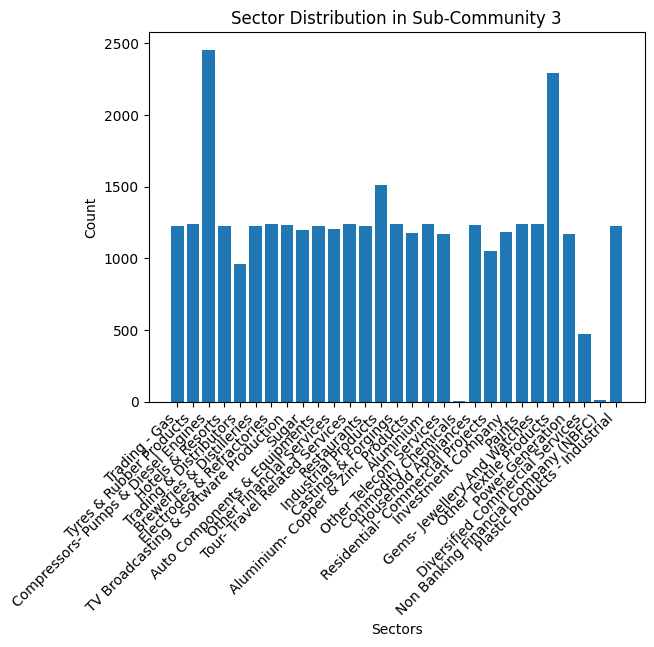

Sub-Community 4 (31 nodes): ['Trent Ltd [Lakme Ltd]', 'Dalmia Bharat Sugar and Industries Ltd', 'Mid India Industries Limited', 'Ruchi Infrastructure Ltd', 'Sagar Soya Products Ltd.,', 'Shyamkamal Investments Ltd.,', 'The Ramco Cements Limited', 'Gujarat Themis Biosyn Ltd.', 'Advance Petrochemicals Ltd.,', 'Arvind Ltd.,', 'Katare Spinning Mills Ltd.,', 'Reliance Chemotex Industries Ltd.,', 'Shalimar Paints Ltd.', 'Andhra Petrochemicals Ltd.,', 'Jain Irrigation Systems Ltd.,', 'Peninsula Land Limited', 'JOHN COCKERILL INDIA LIMITED', 'Permanent Magnets Ltd.', 'Amal Ltd', 'Ruby Mills Ltd.,', 'Apt Packaging Ltd', 'Mahanagar Telephone Nigam Ltd.', 'Uflex Limited', 'Hero MotoCorp Limited', 'HeidelbergCement  India Limited', 'DCW Ltd.,', 'Elpro International Ltd.,', 'Computer Point Ltd.,', 'K.G.Denim Ltd', 'Caprihans India Ltd.,', 'Indokem Ltd']
Unique Sectors: {'2/3 Wheelers', 'Garments & Apparels', 'Packaging', 'Sugar', 'Other Financial Services', 'Telecom - Cellular & Fixed line services'

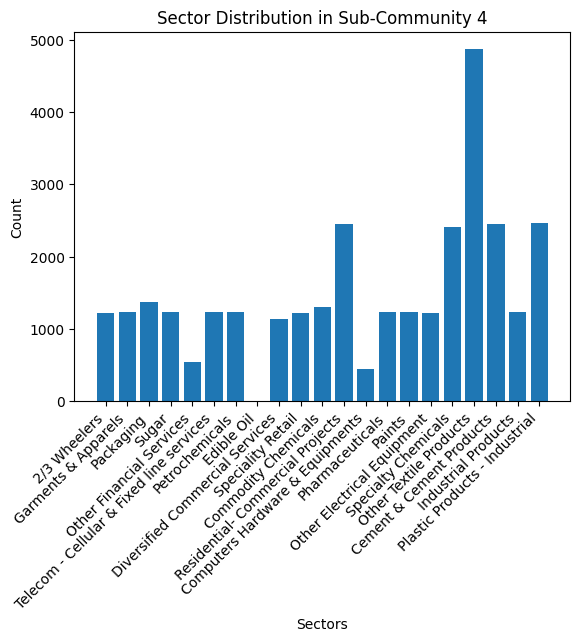

Sub-Community 5 (31 nodes): ['TANFAC Industries Ltd.,', 'Kotak Mahindra Bank Ltd.', 'VELOX INDUSTRIES LIMITED', 'Polychem Ltd', 'SJ Corporation Limited', 'Oriental Carbon & Chemicals Ltd.,', 'Paramount Cosmetics (India) Ltd', 'Kanel Industries Limited', 'JAINEX AAMCOL LTD.', 'India Lease Devl. Ltd.,', 'Rajshree Sugars & Chemicals Ltd.,', 'La Tim Metal & Industries Limited', 'Kiduja  India  Ltd', 'Maharashtra Seamless Ltd.', 'Birla Cable Limited', 'Manugraph India Ltd', 'TGV SRAAC LIMITED', 'PTL Enterprises Ltd', 'Swan Energy Ltd.', 'Jay Shree Tea & Industries Ltd.,', 'Rajasthan Petro Synthetics Ltd.,', 'Sarda Energy & Minerals Ltd', 'Rama Paper Mills Limited,', 'East Buildtech Limited', 'Aruna Hotels Ltd.', 'Bharat Gears Ltd.,', 'Kore Foods Limited', 'Hindustan Oil Exploration Co. Ltd.', 'Peoples Investments Ltd.,', 'Kajaria Ceramics Ltd', 'HFCL LIMITED']
Unique Sectors: {'Telecom - Infrastructure', 'Ceramics', 'Trading - Metals', 'Hotels & Resorts', 'Trading & Distributors', 'Sugar', 

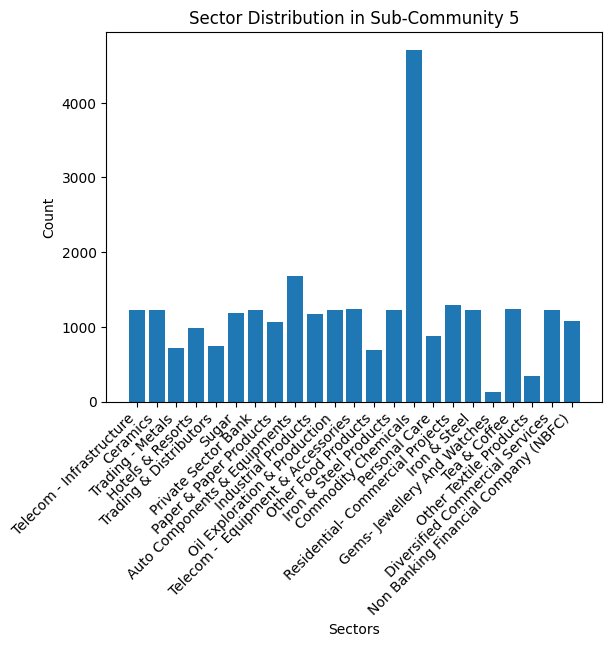

Sub-Community 6 (29 nodes): ['Alembic  Ltd', 'Dhampur Sugar Mills Ltd.,', 'Premier Synthetics Ltd.,', 'NDL Ventures Limited', 'Hindustan Zinc Ltd.,', 'L.g.Balkrishnan & Bros. Ltd.', 'Sindu Valley Technologies Ltd.', 'HB Leasing & Finance Co. Ltd.,', 'Forbes & Company Ltd', 'Exide Industries Ltd.,', 'DELTA MANUFACTURING LIMITED ', 'Universal Cables Ltd.,', 'Nitta Gelatin India Ltd', 'Schaeffler India Limited', 'Hindustan Housing Co. Ltd.,', 'Nelco Ltd', 'Ambalal Sarabhai Enterprise Ltd.,', 'CESC Limited,', 'Blue Chip Tex Industries Ltd.,', 'Tinplate Company of India Ltd.,', 'Khaitan Chemicals & Fertilizers Ltd', 'Rolcon Engineering Co. Ltd.,', 'Tata Investment Corporation Ltd.,', 'Godfrey Phillips India Ltd.,', 'Amara Raja Energy & Mobility Limited', 'Parnax Lab Limited', 'AstraZeneca Pharma India Ltd.', 'VAPI ENTERPRISE LIMITED', 'HINDUSTAN HARDY LIMITED']
Unique Sectors: {'Cigarettes & Tobacco Products', 'Other Industrial Products', 'Packaging', 'TV Broadcasting & Software Production'

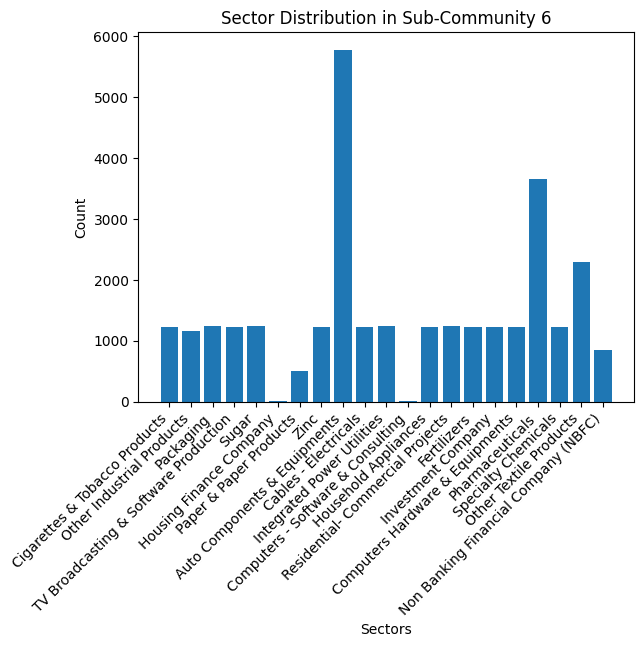

Sub-Community 7 (28 nodes): ['J.B. Chemicals & Pharmaceuticals Lt', 'BPL Ltd.,', 'Gold Rock Investments Ltd.,', 'Hawkins Cooker Ltd.', 'PCBL LIMITED', 'ITD Cementation India Ltd', 'GALAXY CLOUD KITCHENS LIMITED', 'ITC Ltd', 'Krishna Ventures Limited', 'Kovalam Inv. & Trading Co.Ltd.,', 'Pix Transmissions Ltd.,', 'Bombay Dyeing & Mfg. Co. Ltd.,', 'EIH Ltd', 'Envair Electrodyne Ltd.', 'Godrej Industries Ltd.', 'Oswal Agro Mills Ltd.,', 'Lime Chemicals Ltd.', 'Banas Finance Limited', 'AuSom Enterprise Limited', 'AYM Syntex Limited', 'Grasim Industries Ltd.,', 'Orient Paper & Industries Ltd.', 'Lords Chloro Alkali Ltd', 'Rubfila International Ltd.', 'HIL Limited', 'Josts Engineering Co. Ltd.,', 'Century Textiles & Industries Ltd.,', 'Panasonic Carbon India Co.Ltd']
Unique Sectors: {'Rubber', 'Consumer Electronics', 'Tyres & Rubber Products', 'Civil Construction', 'Hotels & Resorts', 'Diversified', 'Carbon Black', 'Electrodes & Refractories', 'Paper & Paper Products', 'Packaged Foods', 'Div

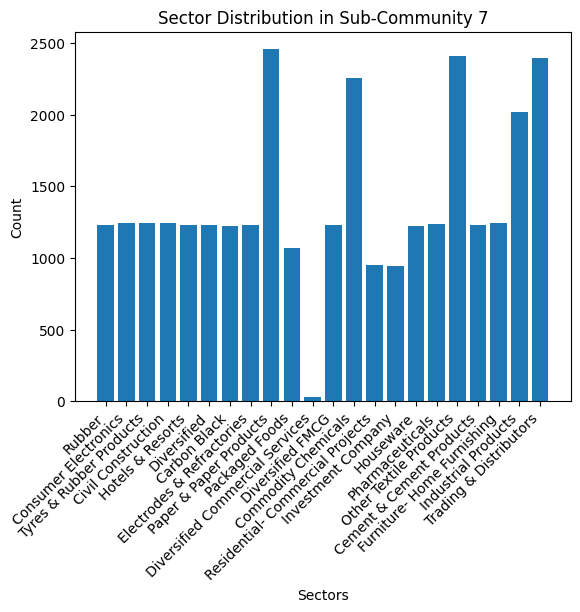

Sub-Community 8 (26 nodes): ['Emerald Leisures Limited', 'TRF Ltd', 'Polson Ltd.,', 'KPT INDUSTRIES LIMITED', 'Century Enka Ltd.,', 'Finolex Industries Ltd.', 'Whirlpool of India Ltd', 'Hindustan Composites Ltd', 'Sunrise Industrial Traders Ltd.,', 'Lupin Ltd', 'Bata India Limited', 'Kanpur Plastipack Limited', 'Cosmo First Limited', 'Cravatex Ltd.', 'Milkfood Ltd.,', 'Panyam Cements & Mineral Inds. Ltd.', 'Lakshmi Machine Works Ltd.,', 'M.R.F. Ltd.,', 'Primo Chemicals Limited', 'Max Financial Services Limited', 'Morepen Laboratories Ltd.', 'Maharashtra Scooters Ltd.,', 'Dhanuka Agritech Ltd.', 'Bayer CropScience Limited.', 'Finolex Cables Ltd.,', 'Jyoti Ltd.,']
Unique Sectors: {'Tyres & Rubber Products', 'Hotels & Resorts', 'Packaging', 'Auto Components & Equipments', 'Other Financial Services', 'Cables - Electricals', 'Life Insurance', 'Footwear', 'Commodity Chemicals', 'Household Appliances', 'Heavy Electrical Equipment', 'Investment Company', 'Pharmaceuticals', 'Dairy Products', 'S

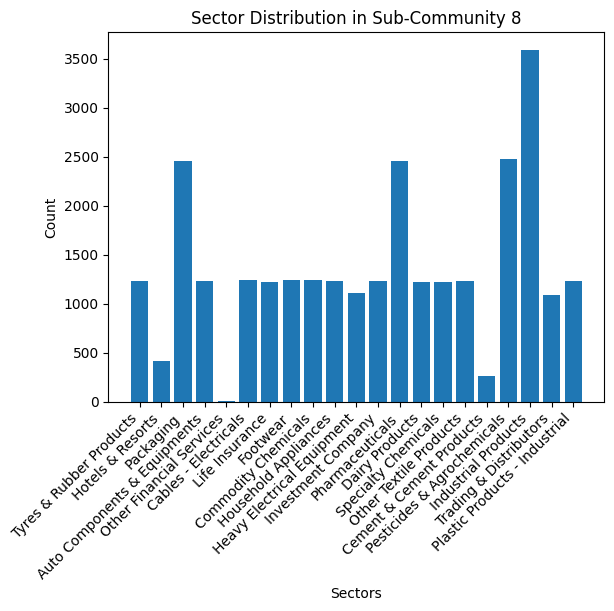

Sub-Communities for Community 2 (Total 193 nodes):
Sub-Community 1 (113 nodes): ['Ravalgaon Sugar Farm Ltd.,', 'Ganesh Benzoplast Ltd.,', 'ASI INDUSTRIES LIMITED', 'Bajaj Electricals Ltd.,', 'Bombay Cycle & Motor Agency Ltd.,', 'Ras Resorts & Apart Hotels Ltd.,', 'Indian Bright Steel Co. Ltd.,', 'Mirc Electronics Ltd', 'Britannia Industries Ltd.,', 'Prakash Industries Ltd.,', 'WELSPUN SPECIALTY SOLUTIONS LIMITED', 'Force Motors Limited', 'Motor & General Finance (M.G.F.) Lt', 'Monotype India Ltd.,', 'GOCL Corporation Limited', 'Oil Country Tubular Ltd.', 'Pil Italica Lifestyle Limited', 'Foseco India Ltd', 'Kaira Can Co. Ltd.,', 'Rama Petrochemicals Ltd', 'Atul Limited.,', "Dr. Reddy's Laboratories Ltd.,", 'Swastik Safe Deposit & Invest. Ltd.', 'Sandur Manganese & Iron Ores Ltd.,', 'Kanoria Chemicals & Industries Ltd.', 'Alfred Herbert (India) Ltd.,', 'BOROSIL RENEWABLES LIMITED', 'M.M. Rubber Company Ltd.,', 'Apollo Hospitals Enterprises Ltd.,', 'Intellivate Capital Ventures Limited',

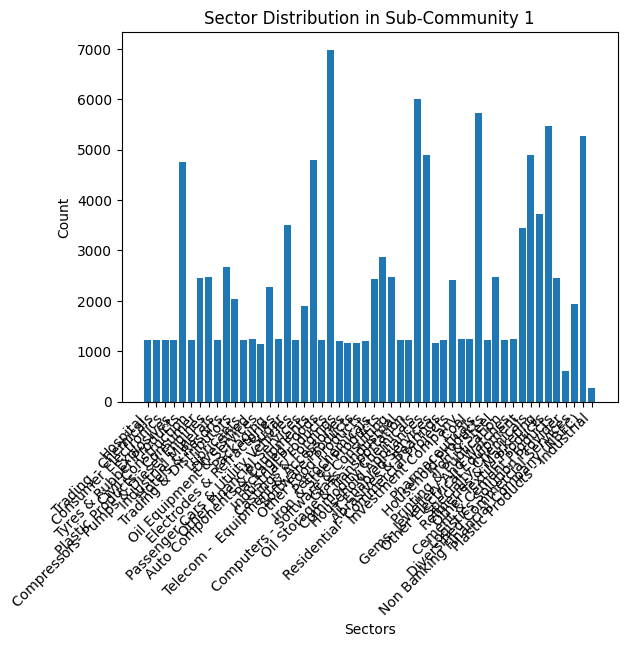

Sub-Community 2 (67 nodes): ['Margo Finance Limited', 'Chambal Fertilisers & Chemicals Ltd', 'GFL LIMITED', 'ATV Projects India Ltd', 'Bharat Electronics Ltd.,', 'HCL Infosystems Ltd', 'CG Power and Industrial Solutions Limited', 'Chowgule Steamships Ltd.,', 'FGP Ltd', 'Shree Digvijay Cement Co. Ltd.,', 'Bharat Heavy Electricals Ltd.,', 'Deepak Nitrite Limited', 'Simplex Realty Limited', 'E.I.D. Parry (India) Ltd.,', 'Kirloskar Ferrous Industries Ltd.', 'DCM Ltd.,', 'Balrampur Chini Mills Ltd.', 'IFCI Ltd.', 'Reliance Capital Limited', 'Goa Carbon Ltd.,', 'Marathon Nextgen Realty Ltd', 'Goodricke Group Ltd.,', 'HDFC Bank Ltd.', 'Punjab Chemicals and Crop Protection Ltd.', 'Stovec Industries Ltd.', 'Goodyear India Ltd.,', 'DIC India Ltd', 'Gujarat Lease Financing Limited,', 'Bajaj Hindusthan Sugar Limited', 'Agro Tech Foods Ltd', 'Tayo Rolls Ltd.', 'AGI GREENPAC LIMITED', 'Pasupati Acrylon Ltd.', 'Everest Industries Ltd.', 'Shree Krishna Paper Mills & Industr', 'Bihar Sponge Iron Ltd', 

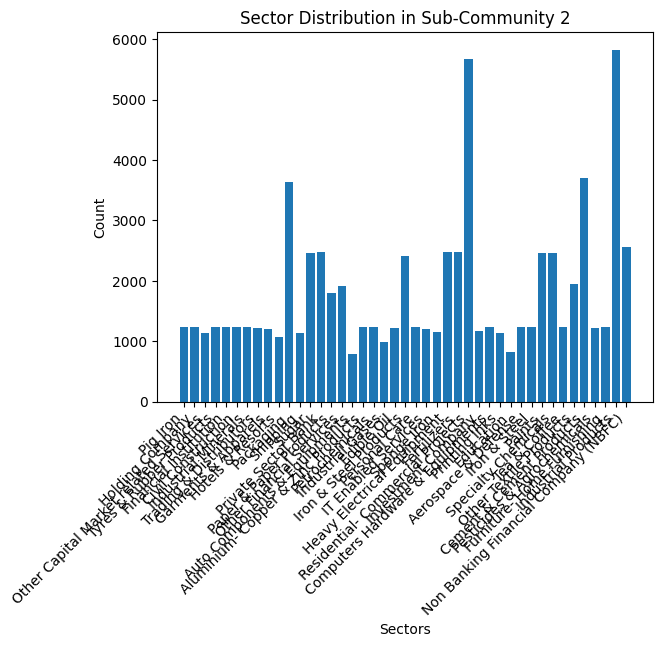

Sub-Community 3 (9 nodes): ['DMCC SPECIALITY CHEMICALS LIMITED', 'GARWARE HI-TECH FILMS LIMITED', 'Keltech Energies Ltd.', 'Sashwat Technocrats Limited', 'Nahar Spinning Mills Ltd.,', 'Makers Laboratories Ltd.', 'VJTF Eduservices Limited', 'Hind Rectifiers Ltd.,', 'Amalgamated Electricity Co. Ltd.,']
Unique Sectors: {'Diversified Commercial Services', 'Specialty Chemicals', 'Other Construction Materials', 'Explosives', 'Other Textile Products', 'Pharmaceuticals', 'Industrial Products', 'Education', 'Plastic Products - Industrial'}


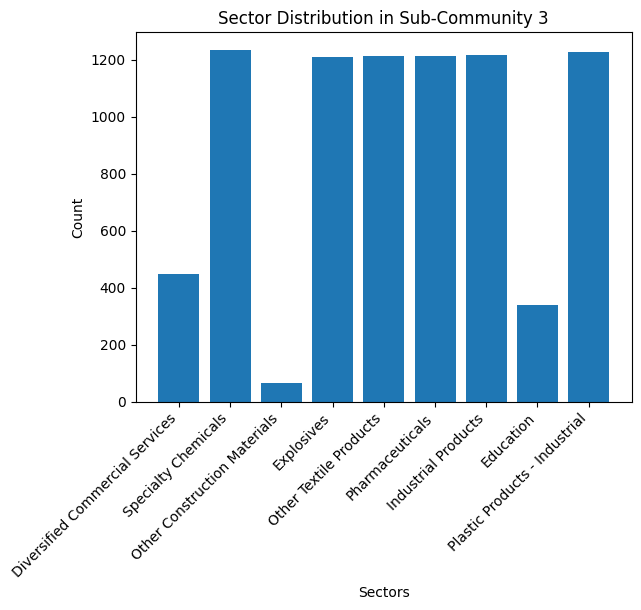

Sub-Community 4 (2 nodes): ['Orient Beverages Ltd.,', 'B & A Ltd.']
Unique Sectors: {'Tea & Coffee', 'Other Beverages'}


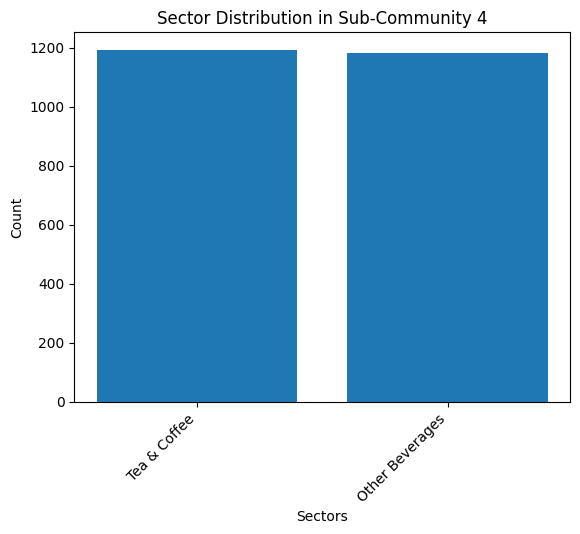

Sub-Community 5 (2 nodes): ['Ridhi Synthetics Ltd.', 'Kirloskar Brothers Ltd.,']
Unique Sectors: {'Compressors- Pumps & Diesel Engines', 'Other Financial Services'}


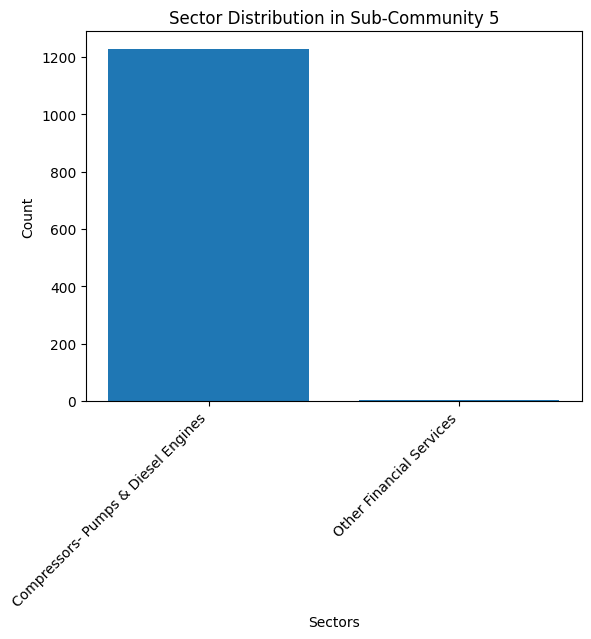

Sub-Communities for Community 3 (Total 167 nodes):
Sub-Community 1 (77 nodes): ['Hindustan Unilever Ltd.,', 'Reliance Infrastructure Ltd', 'Gabriel India Ltd.', 'Oil And Natural Gas Corporation Ltd', 'Netlink Solutions (India) Ltd.', 'Jaykay Enterprises Limited', 'Addi Industries Ltd.,', 'Nilachal Refractories Ltd.', 'Piramal Enterprises Limited', 'FERMENTA BIOTECH LIMITED', 'PRISMX GLOBAL VENTURES LIMITED', 'WPIL Ltd', 'Foods & Inns Ltd.', 'Maharashtra Corporation Ltd.', 'IFB Agro Industries Ltd', 'Warren Tea Ltd.', 'Raja Bahadur International Ltd', 'Reliance Industries Ltd', 'Bliss GVS Pharma Limited', 'MODULEX CONSTRUCTION TECHNOLOGIES LIMITED', 'Arshiya Limited', 'Cummins India Ltd.,', 'Pankaj Piyush Trade & Inv. Ltd', 'MODISON LIMITED', 'Gufic BioSciences Ltd.', 'Brady & Morris Engineering Co. Ltd.', 'Panasonic Energy India Co. Ltd.', 'Shree Manufacturing Co. Ltd.,', 'UTIQUE ENTERPRISES LIMITED', 'Anuh Pharma Ltd.,', 'Sudal Industries Limited', 'AMJ LAND HOLDINGS LIMITED', 'Global

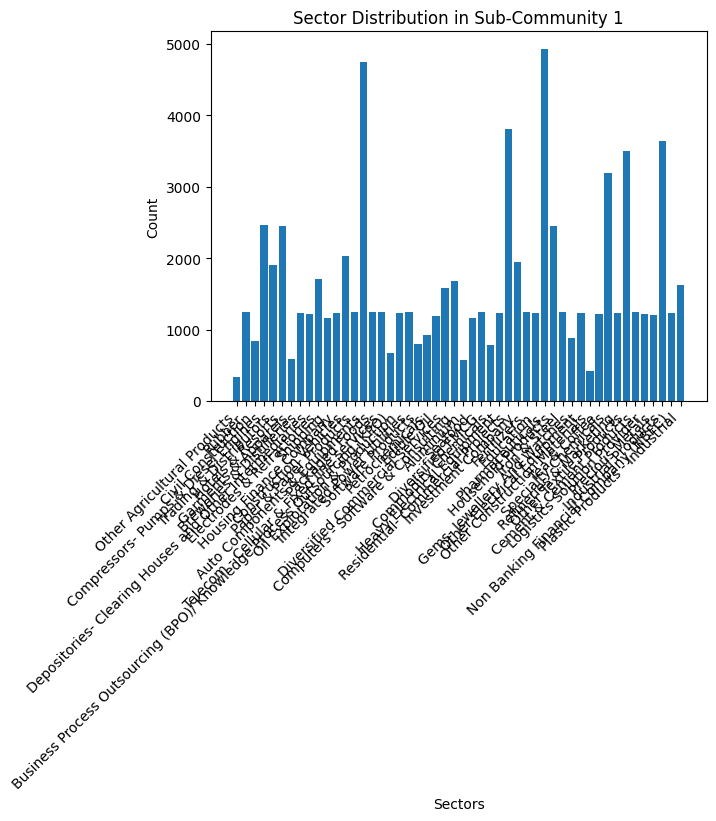

Sub-Community 2 (70 nodes): ['Infomedia Press Limited', 'Jindal Poly Films Ltd.', 'Ceat Ltd.,', 'Bajaj Finance Limited', 'Integra Engineering India Ltd.', 'National Standard (India) Limited', 'Confidence Finance And Trading Limited', 'Kratos Energy & Infrastructure Limited', 'SKF India Ltd.', 'Hindustan Motors Ltd.,', 'Bharat Bijlee Ltd.,', 'Lakshmi Mills Company ltd', 'Tata Chemicals Ltd', 'UTL Industries Limited', 'International Travel House Ltd', 'Federal Bank Ltd.', 'Veljan Denison Limited', 'Escorts Kubota Limited', 'Industrial & Prudential Inv. Co. Lt', 'Swadeshi Polytex Ltd.,', 'Bhagwati Autocast Limited', 'ACC Ltd', 'TUTICORIN ALKALI CHEMICALS AND FERTILIZERS LIMITED', 'Bharat Petroleum Corpn. Ltd.,', 'Texmaco Infrastructure & Holdings Ltd', 'Jindal Saw Ltd.', 'Delton Cables Ltd.,', 'Nesco Ltd', 'JK Lakshmi Cement Limited', 'Sundram Fasteners Ltd.,', 'Tokyo Plast International Ltd.', 'State Bank Of India,', 'Ashok Leyland Ltd.,', 'SPML Infra Limited', 'Mahindra & Mahindra Ltd.'

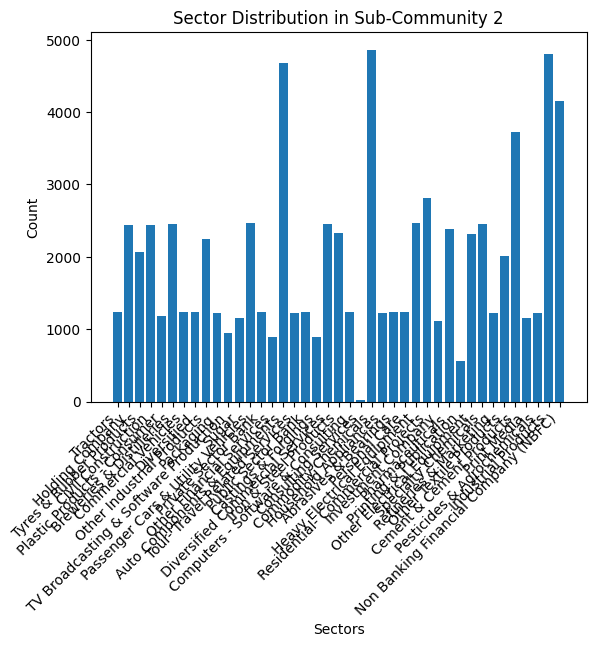

Sub-Community 3 (20 nodes): ['Amines & Plasticizers Ltd', 'Sadhana Nitrochem Ltd.,', 'Tata Power Co. Ltd', 'Sudarshan Chemical Indus. Ltd.,', 'BASF India Ltd', 'RSWM Limited', 'Torrent Pharmaceuticals Ltd.', 'Surya Roshni Ltd.,', 'IG Petrochemicals Ltd', 'Vedanta Limited', 'Mac Charles (India) Ltd.,', 'Jagatjit Industries Ltd.,', 'Ultramarine & Pigments Ltd.,', 'Birla Corporation Ltd.', 'Deccan Cements Ltd.,', 'G.M. Breweries Ltd.', 'Rain Industries Limited', 'Mysore Petro Chemicals Ltd.,', 'JCT Ltd', 'ALGOQUANT FINTECH LIMITED']
Unique Sectors: {'Petrochemicals', 'Trading - Chemicals', 'Dyes And Pigments', 'Specialty Chemicals', 'Iron & Steel Products', 'Diversified Metals', 'Other Financial Services', 'Commodity Chemicals', 'Other Textile Products', 'Cement & Cement Products', 'Hotels & Resorts', 'Breweries & Distilleries', 'Integrated Power Utilities', 'Pharmaceuticals'}


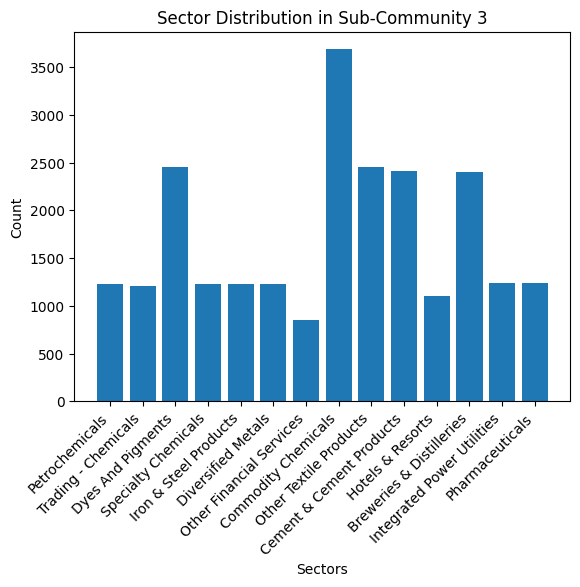

Sub-Communities for Community 4 (Total 29 nodes):
Sub-Community 1 (11 nodes): ['GlaxoSmithkline Pharmaceuticals Ltd.', 'Satra Properties(India) Ltd', 'Gujarat State Fertilizers & Chem.Ltd', 'Benares Hotels Ltd', 'Akzo Nobel India Limited', 'Nestle India Ltd.', 'Zuari Industries Limited', 'Dalal Street Investments Ltd.,', 'Novartis India Limited.', 'Colgate-Palmolive (India) Ltd.,', 'Pfizer Ltd.,']
Unique Sectors: {'Paints', 'Sugar', 'Personal Care', 'Packaged Foods', 'Fertilizers', 'Hotels & Resorts', 'Residential- Commercial Projects', 'Investment Company', 'Pharmaceuticals'}


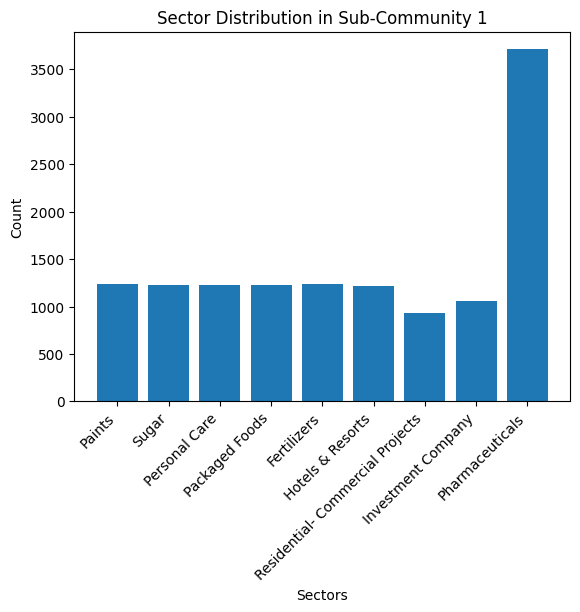

Sub-Community 2 (8 nodes): ['Saptak Chem And Business Limited', 'International Conveyors Ltd.,', 'JAMSHRI REALTY LIMITED', 'Bombay Wire Ropes Ltd.,', 'Best Eastern Hotels Limited', 'United Interactive Limited', 'Diamines & Chemicals Ltd.,', 'JSL Industries Ltd.,']
Unique Sectors: {'Other Electrical Equipment', 'Iron & Steel Products', 'Specialty Chemicals', 'IT Enabled Services', 'Residential- Commercial Projects', 'Hotels & Resorts', 'Industrial Products', 'Trading & Distributors'}


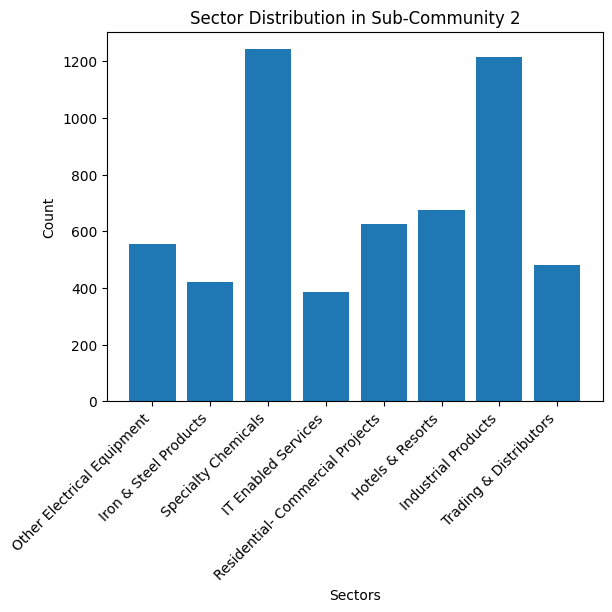

Sub-Community 3 (7 nodes): ['HARSHIL AGROTECH LIMITED', 'GHCL Ltd.', 'TATA CONSUMER PRODUCTS LIMITED', 'Alkyl Amines Chemicals Ltd.,', 'Unichem Laboratories Ltd.,', 'Indian Sucrose Ltd.', 'Mukand Ltd.,']
Unique Sectors: {'Iron & Steel', 'Sugar', 'Specialty Chemicals', 'Tea & Coffee', 'Commodity Chemicals', 'Industrial Products', 'Pharmaceuticals'}


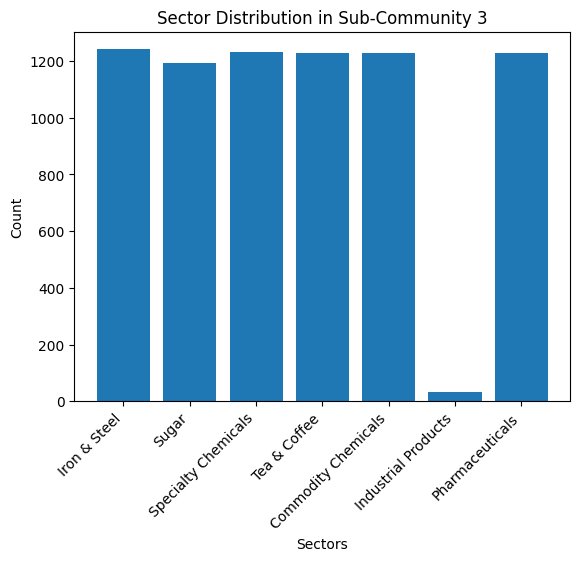

Sub-Community 4 (3 nodes): ['NCL Industries Limited,', 'Saurashtra Cement Limited', 'Mangalam Cement Ltd.,']
Unique Sectors: {'Cement & Cement Products'}


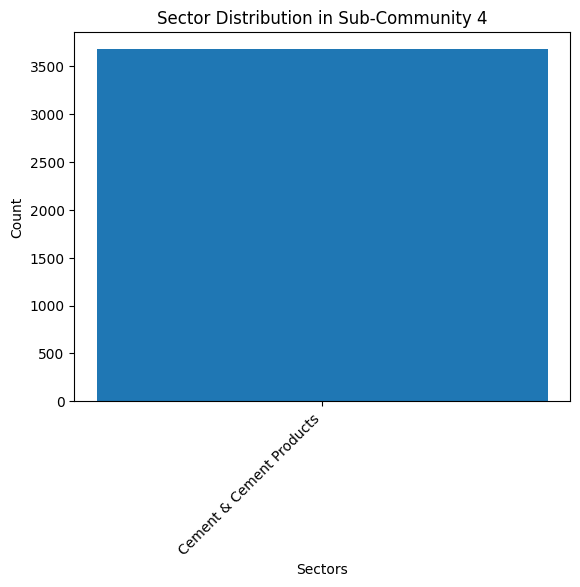

Sub-Communities for Community 5 (Total 4 nodes):
Sub-Community 1 (4 nodes): ['Manali Petrochemicals Ltd.,', 'Modern Shares and Stockbrokers Ltd.', 'Tulive Developers Limited', 'Multipurpose Trading & Agencies Ltd']
Unique Sectors: {'Petrochemicals', 'Industrial Products', 'Diversified Commercial Services', 'Other Financial Services'}


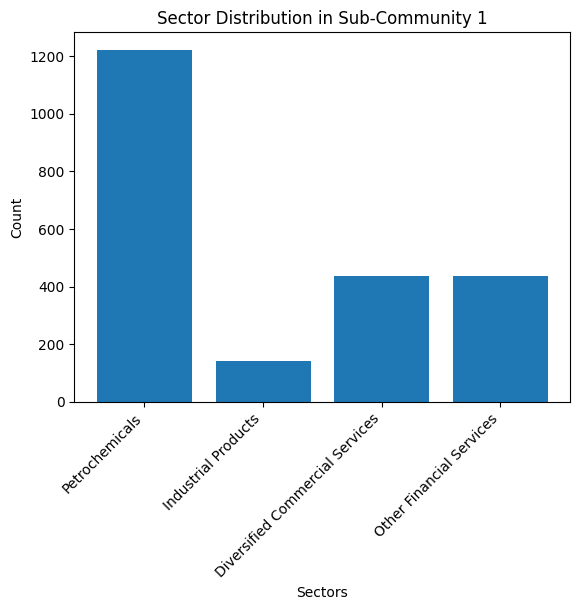

In [62]:
import matplotlib.pyplot as plt

# Assuming you already have communities obtained using greedy_modularity_communities
communities = list(nx.community.greedy_modularity_communities(G))

# Function to find sub-communities within a given community
def find_sub_communities(community, G):
    subgraph = G.subgraph(community)
    sub_communities = list(nx.community.greedy_modularity_communities(subgraph))
    return sub_communities

# Find sub-communities for each community
all_sub_communities = []
for i, community in enumerate(communities):
    sub_communities = find_sub_communities(community, G)
    all_sub_communities.append(sub_communities)

    print(f"Sub-Communities for Community {i + 1} (Total {len(community)} nodes):")
    for j, sub_community in enumerate(sub_communities):
        unique_sectors = set()
        print(f"Sub-Community {j + 1} ({len(sub_community)} nodes): {list(sub_community)}")
        for comm in list(sub_community):
            sectors = data.loc[data['Issuer Name'] == comm, 'Sector'].values
            unique_sectors.update(sectors)
        print(f"Unique Sectors: {unique_sectors}")

        # Bar graph for sector distribution within the sub-community
        sector_counts = {}
        for sector in unique_sectors:
            count = sum(data.loc[data['Sector'] == sector, 'Issuer Name'].isin(sub_community))
            sector_counts[sector] = count

        plt.bar(sector_counts.keys(), sector_counts.values())
        plt.xlabel('Sectors')
        plt.ylabel('Count')
        plt.title(f'Sector Distribution in Sub-Community {j + 1}')
        plt.xticks(rotation=45, ha='right')
        plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# List of community detection algorithms to test communities = list(nx.community.greedy_modularity_communities(G))
algorithms = [
    ("Girvan-Newman", nx.community.girvan_newman(G)),
    ("Louvain", nx.community.greedy_modularity_communities(G)),
    ("Label Propagation", nx.community.label_propagation_communities(G)),
    ("K-Clique", nx.community.k_clique_communities(G, 10)),  # Adjust k as needed
    ("Modularity", nx.community.greedy_modularity_communities(G)),  # Modularity-based detection
    # Add more algorithms as needed
]

# Dictionary to store the number of communities detected for each algorithm
community_counts = {}
# Iterate through the algorithms and print the number of communities
for algorithm_name, algorithm in algorithms:
    if isinstance(algorithm, list):
        communities = algorithm
    else:
        communities = list(algorithm)

    num_communities = len(communities)
    community_counts[algorithm_name] = num_communities
    print(f"{algorithm_name} detected {num_communities} communities")


# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(community_counts.keys(), community_counts.values())
plt.xlabel("Community Detection Algorithm")
plt.ylabel("Number of Communities Detected")
plt.title("Number of Communities Detected by Different Algorithms")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()